# Análise dos dados

#### 1 - Carga dos dados preparados

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

df = pd.read_pickle("../../Data/Processed/df_prepared.pkl") 

df.head()

,Pot_ativa,Pot_reativa,Tensao,Corrente,Ene_cozinha,Ene_lavanderia,Ene_porao,Mes,Ano,Inverno,Primavera,Verao,Outono
0,1209.176,34.922,235.915,13.8,0.0,546.0,4926.0,12,2006,1,0,0,0
1,3390.460,226.006,240.315,9.8,2033.0,4187.0,13341.0,12,2006,1,0,0,0
2,2203.826,161.792,241.470,6.2,1063.0,2621.0,14018.0,12,2006,1,0,0,0
3,1666.194,150.942,242.200,2.2,839.0,7602.0,6197.0,12,2006,1,0,0,0
4,2225.748,160.998,243.030,5.4,0.0,2648.0,14063.0,12,2006,1,0,0,0


#### 2 - Algumas visualizações

> Distribuição dos dados mais importantes

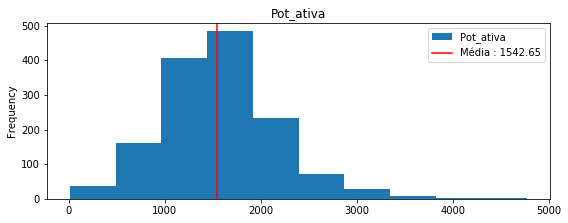

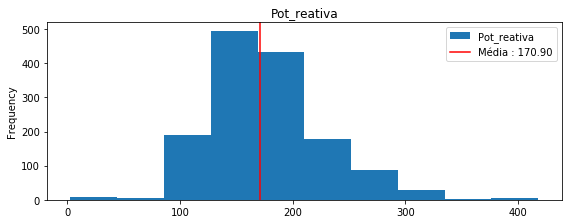

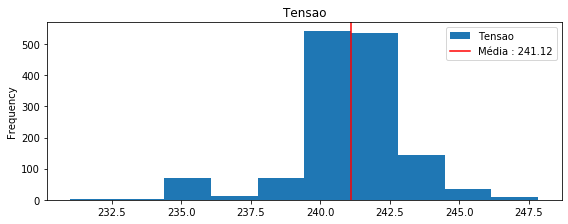

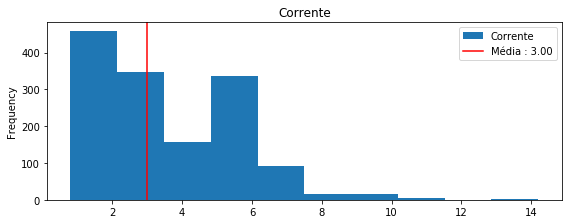

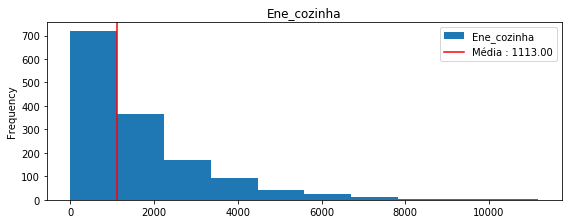

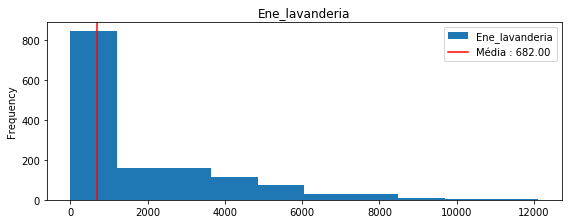

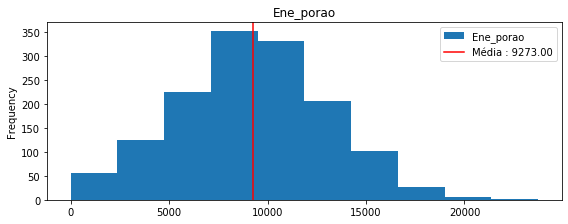

In [10]:
# Referência: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist
#             https://matplotlib.org/stable/plot_types/stats/hist_plot.html#sphx-glr-plot-types-stats-hist-plot-py
#             https://youtu.be/XDv6T4a0RNc

# Para cada coluna plotar o histograma com a média de cada coluna
for col in df.columns[:7]:
    plt.figure()
    df[col].plot.hist(bins=10, figsize=(8,3), legend=True)
    # Calcula a média e a plota de vermelho
    median = df[col].median()
    plt.axvline(median, color='red', label=f'Média : {median:.2f}')
    # Configura o gráfico
    plt.style.use('_classic_test_patch')
    plt.tight_layout()
    plt.legend(ncol = 1)
    plt.title(col)

> Distribuição de registros por ano

In [11]:
grp_by_ano = df.groupby('Ano')['Pot_ativa'].count()

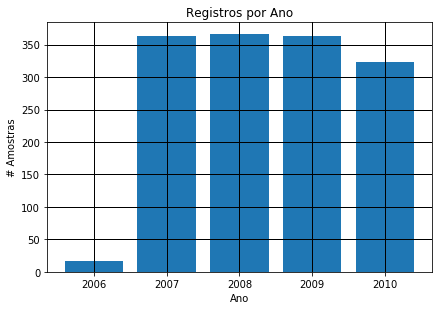

In [12]:
plt.figure()
plt.grid(linewidth = 1, color = 'black')
plt.bar(df['Ano'].unique(),grp_by_ano)
plt.style.use('_classic_test_patch')
plt.tight_layout()
plt.title('Registros por Ano')
plt.xlabel('Ano')
plt.ylabel('# Amostras')
plt.show()

> Vamos filtrar o dataframe para todos os anos e verificar se há muita diferença de distribuição e correlação entre as variáveis

In [13]:
df_2006 = df[df['Ano']==2006]
df_2007 = df[df['Ano']==2007]
df_2008 = df[df['Ano']==2008]
df_2009 = df[df['Ano']==2009]
df_2010 = df[df['Ano']==2010]

> Correlação entre os dados mais importantes

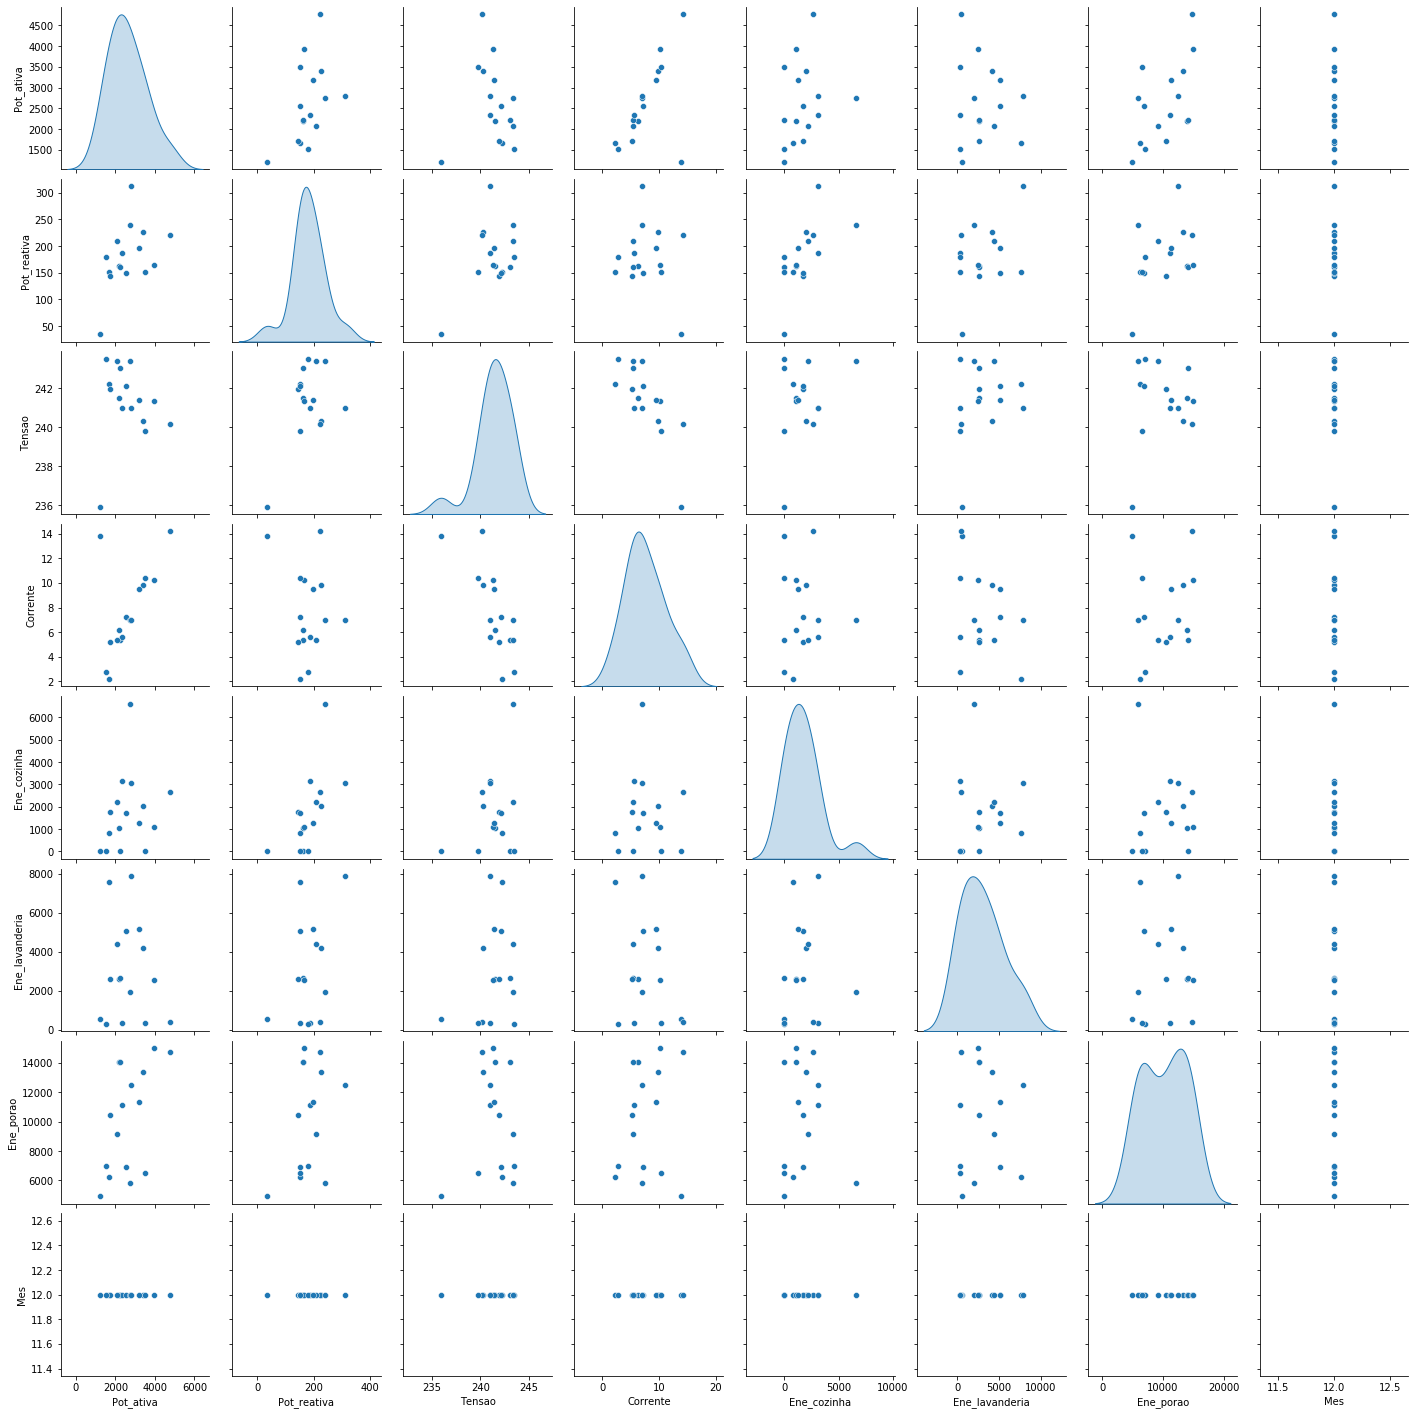

In [14]:
# Referência: https://seaborn.pydata.org/generated/seaborn.pairplot.html

sb.pairplot(df_2006.iloc[:,:8], diag_kind='kde')

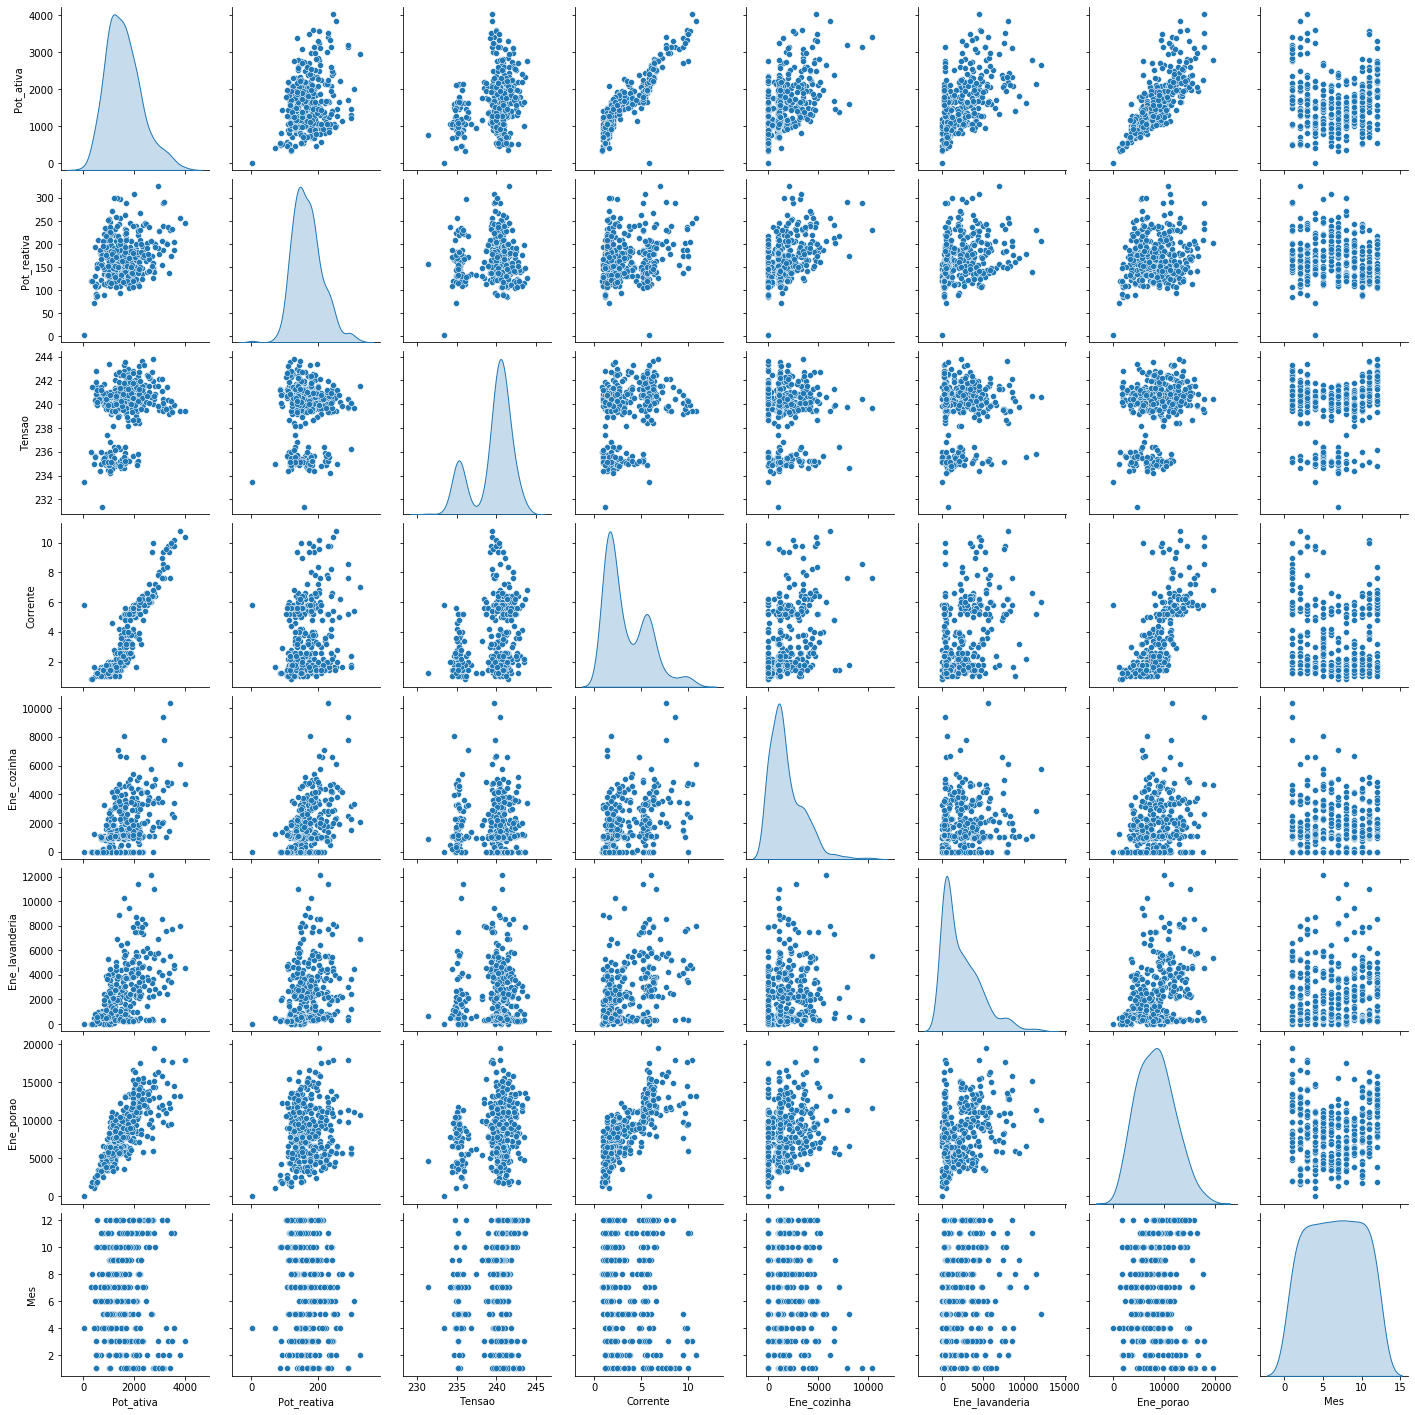

In [15]:
sb.pairplot(df_2007.iloc[:,:8], diag_kind='kde')

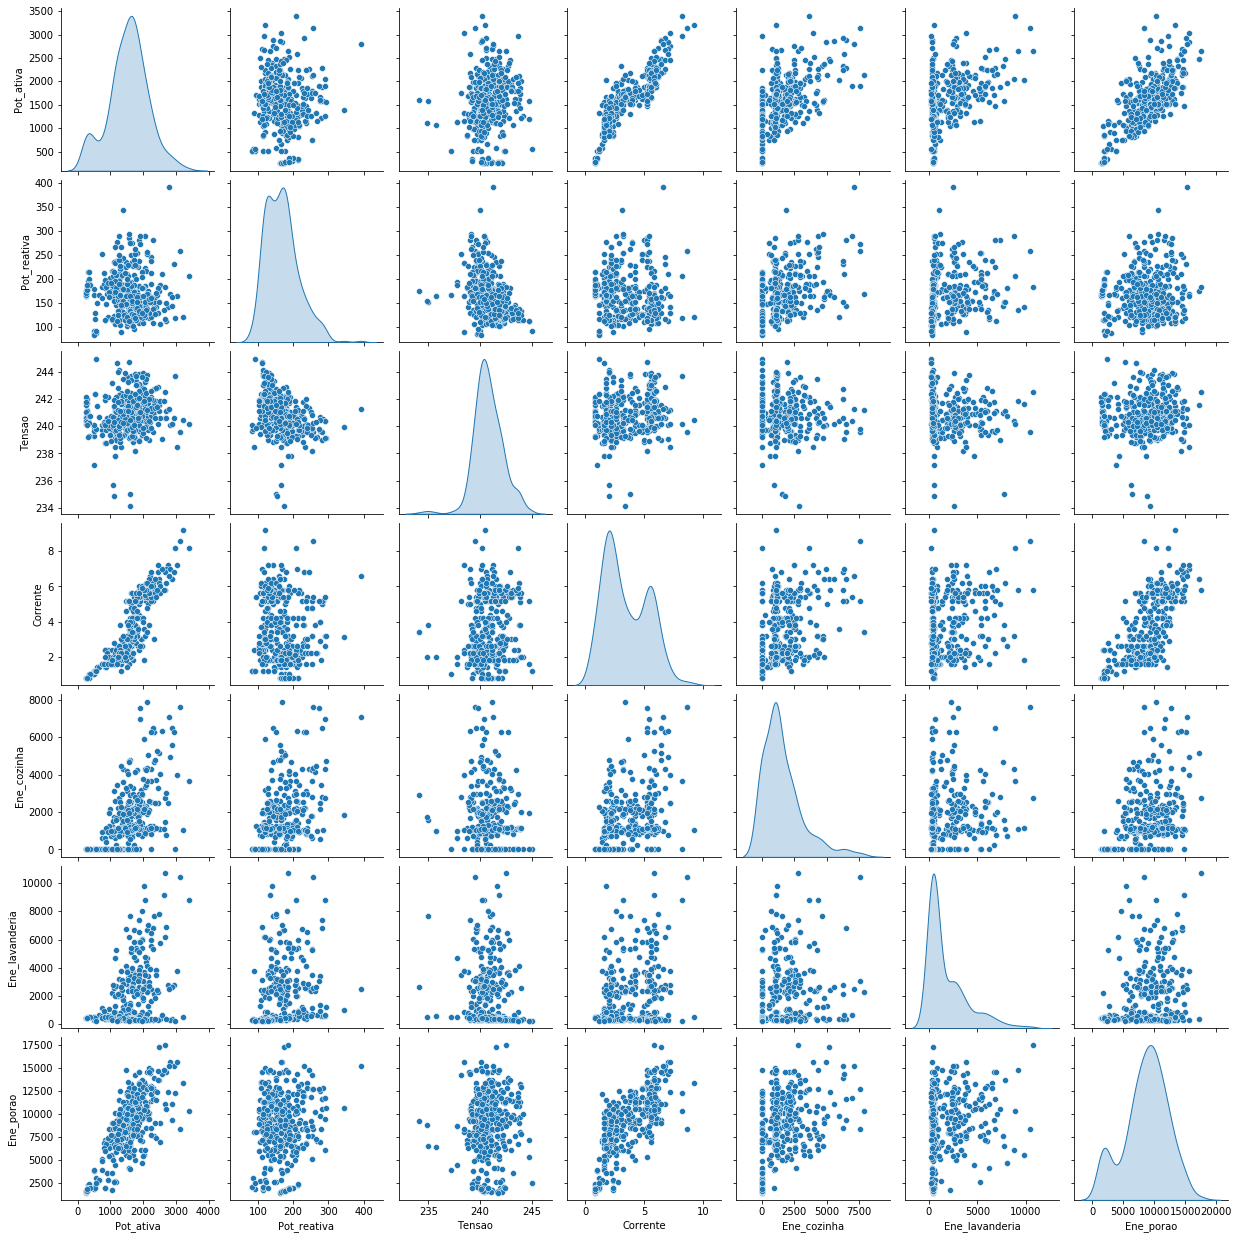

In [16]:
sb.pairplot(df_2008.iloc[:,:7], diag_kind='kde')

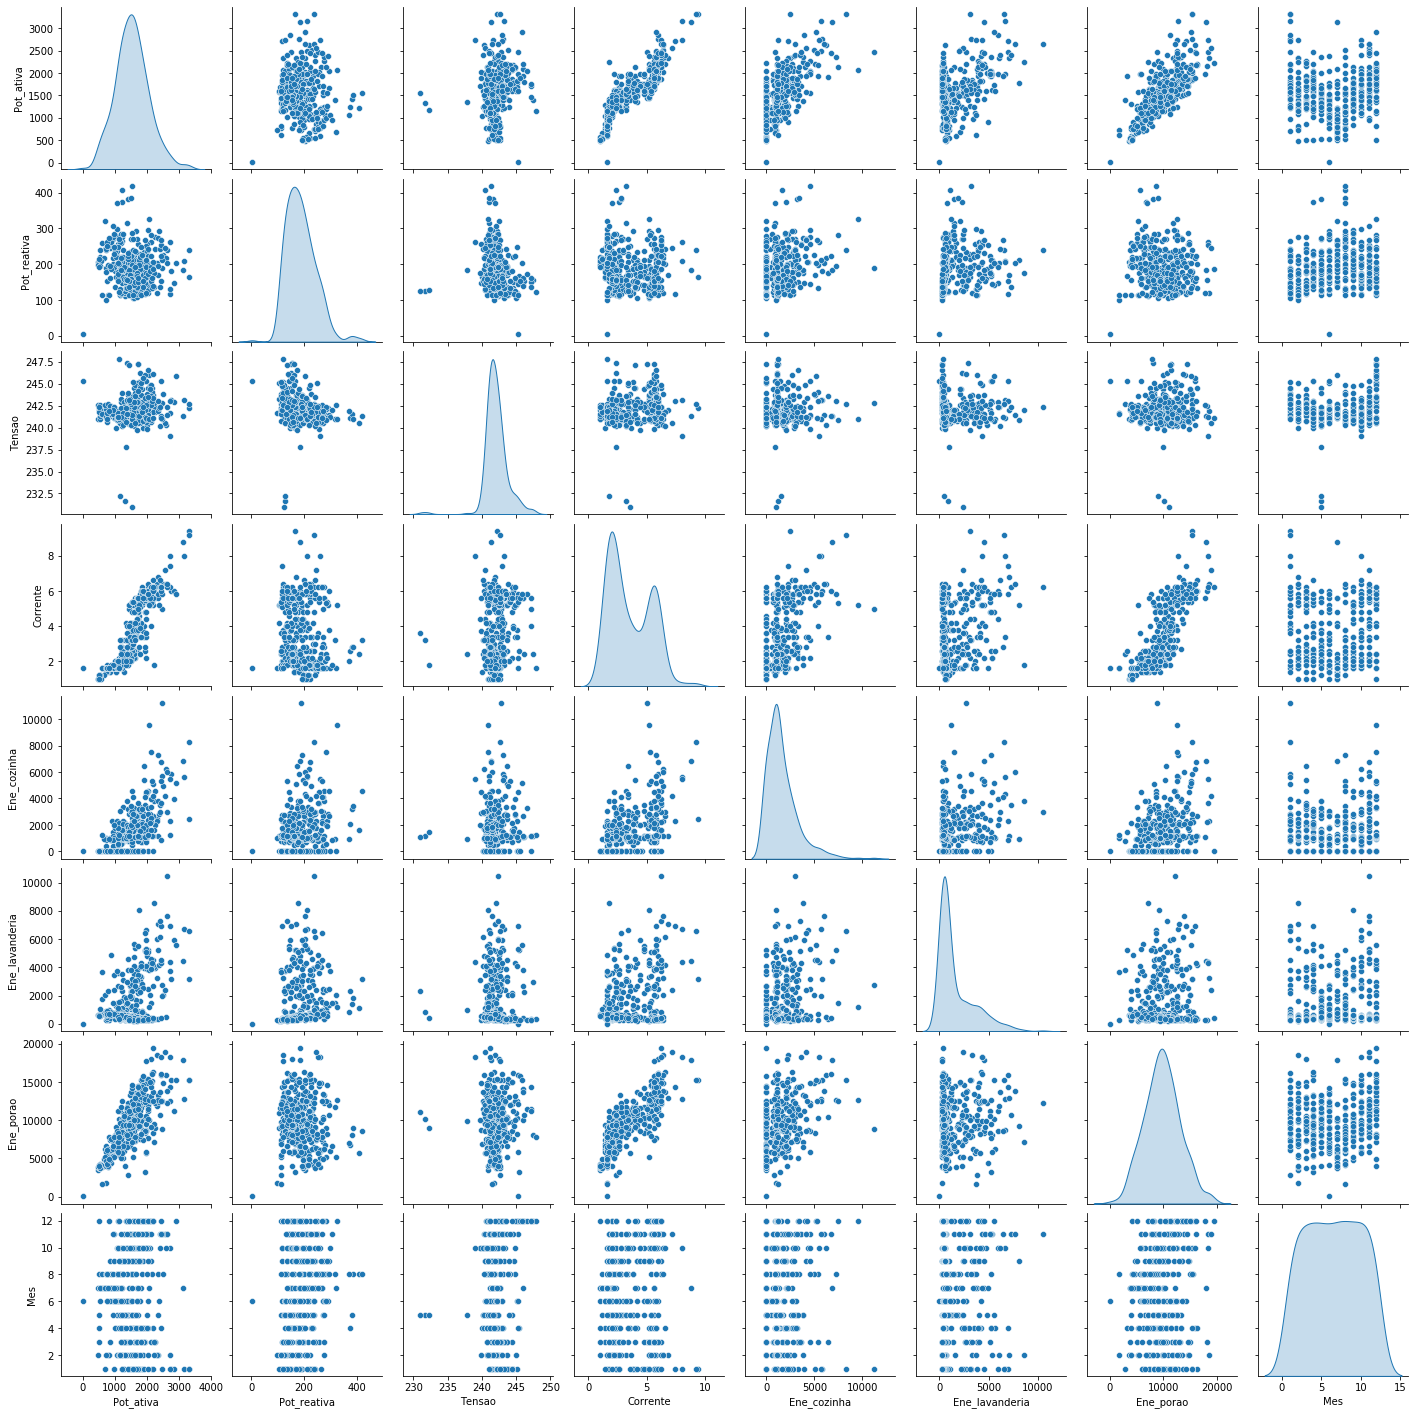

In [17]:
sb.pairplot(df_2009.iloc[:,:8], diag_kind='kde')

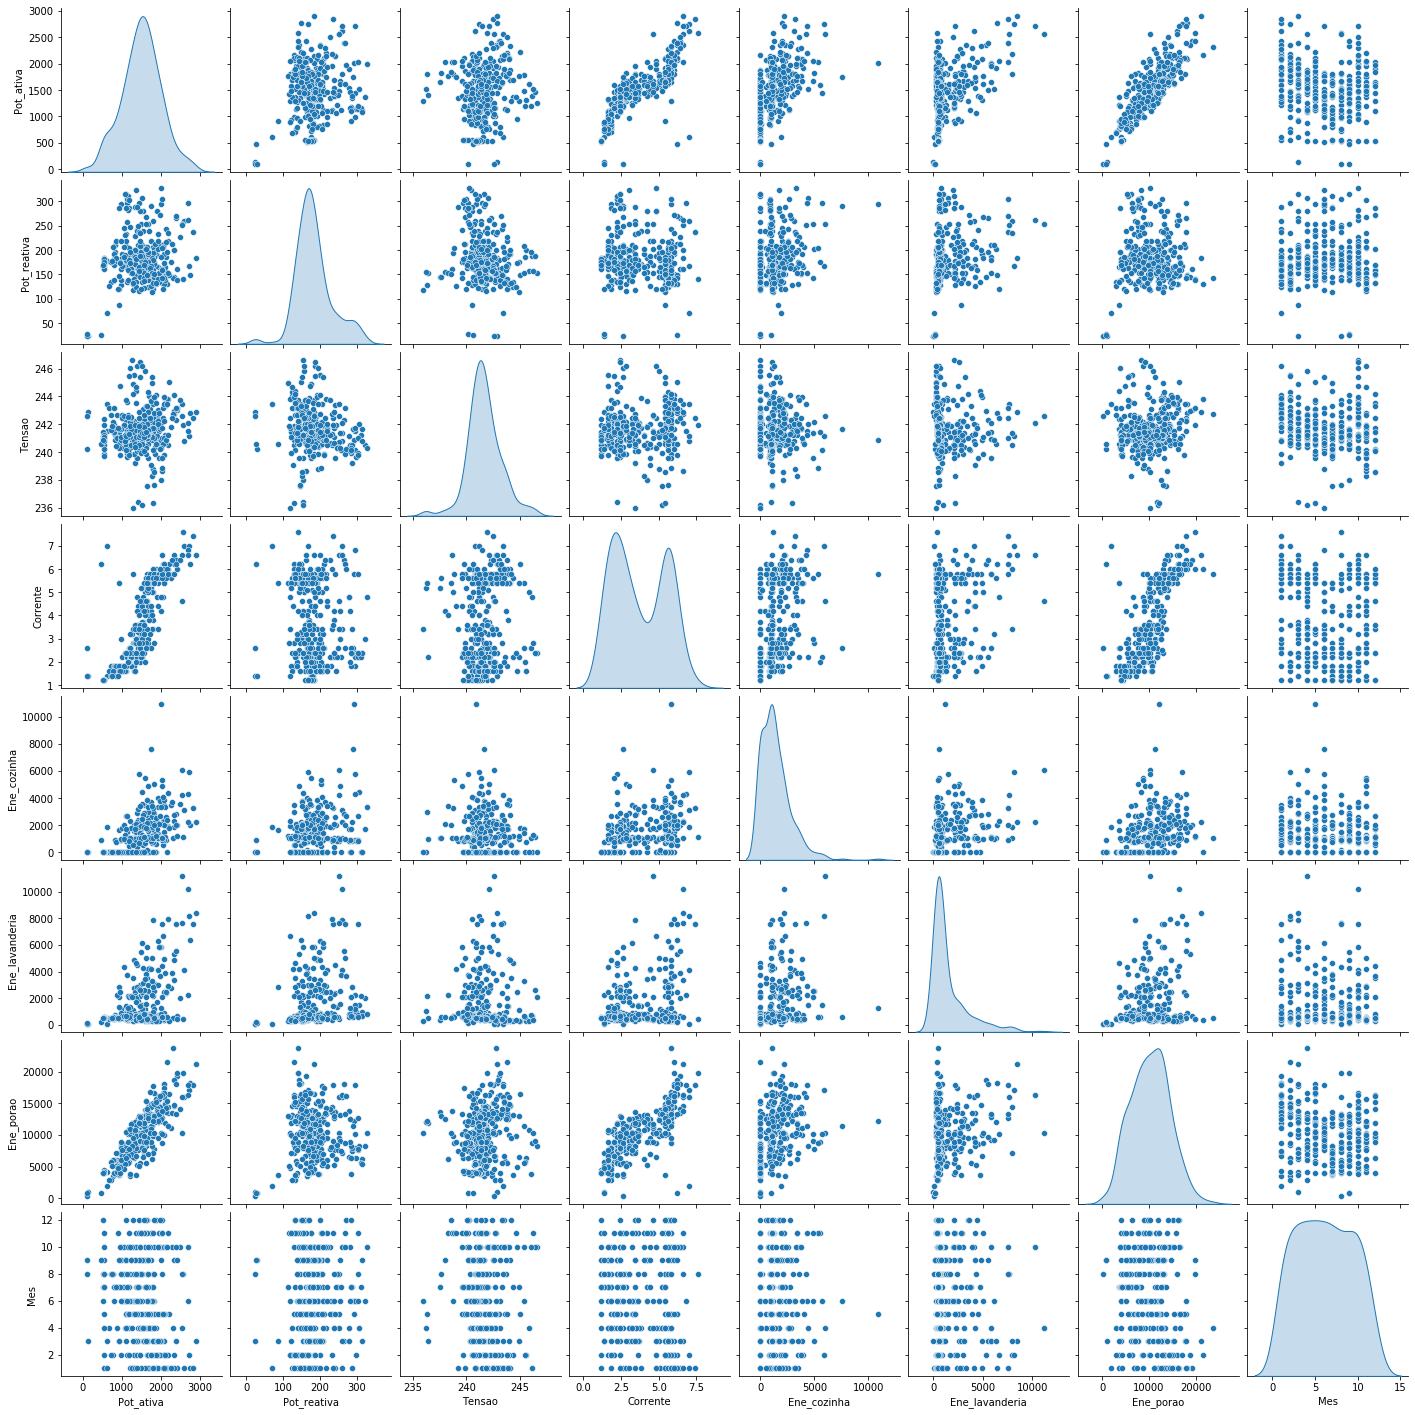

In [18]:
sb.pairplot(df_2010.iloc[:,:8], diag_kind='kde')

> Praticamente não temos diferença entre os anos no que se refere as distribuições e correlação entre as variáveis, logo podemos utilizar qualquer ano para a clusterização.

> Visualização de outliers com box plot

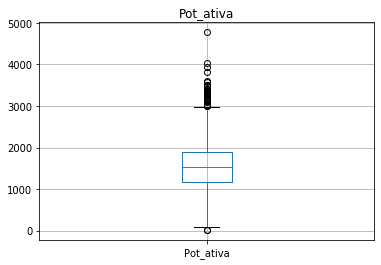

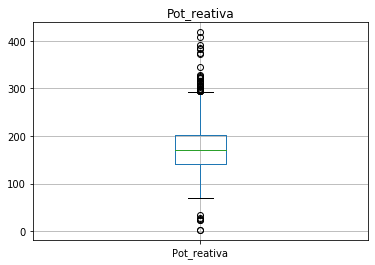

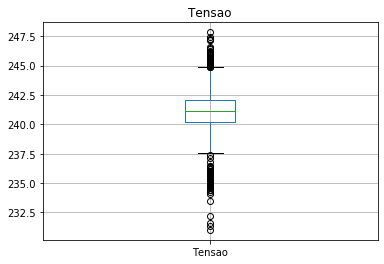

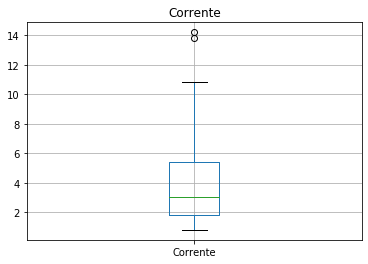

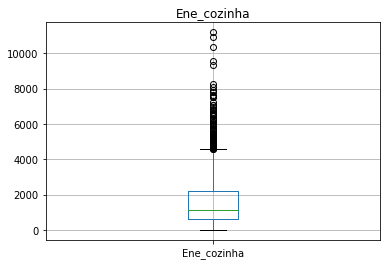

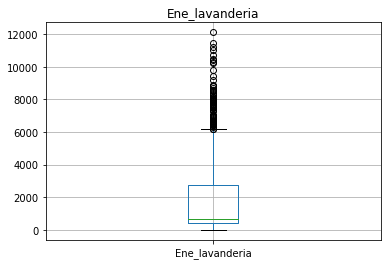

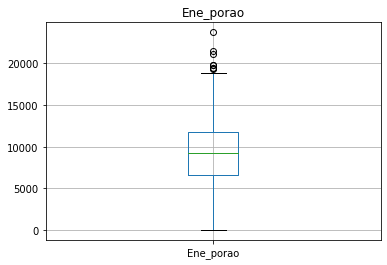

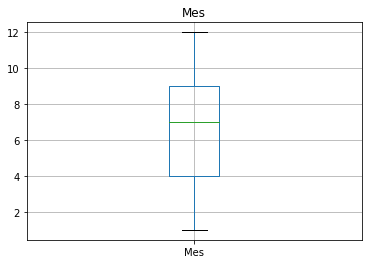

In [19]:
#Referência: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html

for col in df.columns[:8]:
    plt.figure()
    df.boxplot(column = col)
    plt.title(col)

> Notamos que algumas váriáveis apresentam muitos outliers tanto acima do limite superior, quanto do limite inferior. Devemos avaliar se esses outliers devem ser excluídos da análise, se devemos substituir seus valores por outros, por exemplo a média dos quartis Q3 para superiores e Q1 para inferiores ou alguma transformação que reduza a sua importância. Isso não se aplica, claro, se o objetivo da análise é justmente descobrir os outliers.

#### 3 - Salvando o dataframe de 2009

In [20]:
# Poderíamos ter escolhido qualquer um, com ressalvas para 2006 que só contém o mês 12

# Eliminamos a coluna do ano já que a mesma não muda neste novo dataframe

df_2009.to_pickle("../../Data/Processed/df_2009.pkl")